In [1]:
# import sys
# sys.path.insert(0,'/home/kmatsuno/h5py/build/lib.linux-x86_64-2.7/')
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import numpy as np
import floatpy.readers.padeops_reader as por
import scripts.statistics as stats
import scripts.get_namelist as nml
from scripts.common import *


def visualize_one(reader, step, qname, plane, cmap, dtheta=0,domega=0,savename=''):
    reader.step = step
    fs = 12
    q = reader.readData(qname)
    q = np.squeeze(np.array(q))
    
    fig = plt.figure(figsize=(4,6), dpi=200) 
    axarr = plt.axes()

    # Plot the colors
    if plane=='xy': data2plot = np.transpose(q)
    if plane=='xz': data2plot = np.transpose(q)
    im = axarr.imshow( data2plot, cmap=cmap, origin='lower', interpolation='nearest')#spline36
    axarr.set_xticks([])
    axarr.set_yticks([]) 
    #axarr.set_ylim([Ny/2-200,Ny/2+200])
    axarr.set_title(r'Time: t = ' + str(np.around(reader.time,-1)),size=fs)
    
    axarr.set_xlabel('x')
    if plane=='xy':axarr.set_ylabel('y')
    if plane=='xz':axarr.set_ylabel('z')
    
    # set the colorbar
    divider1 = make_axes_locatable(axarr)
    cax = divider1.append_axes('right', size='5%', pad=0.1)
    maxval = np.amax(q);
    minval = np.amin(q);
    cbar = plt.colorbar(im, cax,ticks=[minval, maxval])
    cbar.ax.set_yticklabels(['%0.2f'%(minval), '%0.2f'%(maxval)]) 
    cbar.ax.tick_params(labelsize=0.75*fs)    
    
    # overlay the centerline, momentum and vorticity thickness
    if plane=='xy' and (dtheta>0 or domega>0):
        xplot = np.linspace(0,Nx-1,10)
        ones = np.ones(np.shape(xplot))
        centerline = Ny/2*ones
        lw = 0.5
        axarr.plot(xplot,centerline,'k-',alpha=0.5,linewidth=lw)
        if (domega>0):
            axarr.plot(xplot,centerline+dy*domega,'k-.',alpha=0.5,linewidth=lw)
            axarr.plot(xplot,centerline-dy*domega,'k-.',alpha=0.5,linewidth=lw)
        if (dtheta>0):
            axarr.plot(xplot,centerline+dy*dtheta,'k--',alpha=0.5,linewidth=lw)
            axarr.plot(xplot,centerline-dy*dtheta,'k--',alpha=0.5,linewidth=lw)
    
    # set the overall title and save
    if savename:
        plt.savefig(savename, dpi=500)#, bbox_inches='tight',pan_inches=0.5)
        plt.close(fig)
        print "Saved plot to ",savename
    else: plt.show
    

In [2]:
directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr3/1024x1448x512/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/724x1024x362/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/512x724x256/'

filename_prefix = directory+'/shearlayer_'
reader = por.PadeopsReader(filename_prefix, periodic_dimensions=(True,False,True))
inp = nml.inputs(directory,verbose=True)
Nx,Ny,Nz,Lx,Ly,Lz = nml.read_grid_params(directory,verbose=True)
steps = sorted(reader.steps)
print("Steps: {}".format(steps))

Params for this run:
	Mc = 0.2
	Re = 1000.0
	rr = 3.5
Params for this grid:
	N = 1024x1448x512
	L = 150.0x100.0x75.0
Steps: [0, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]


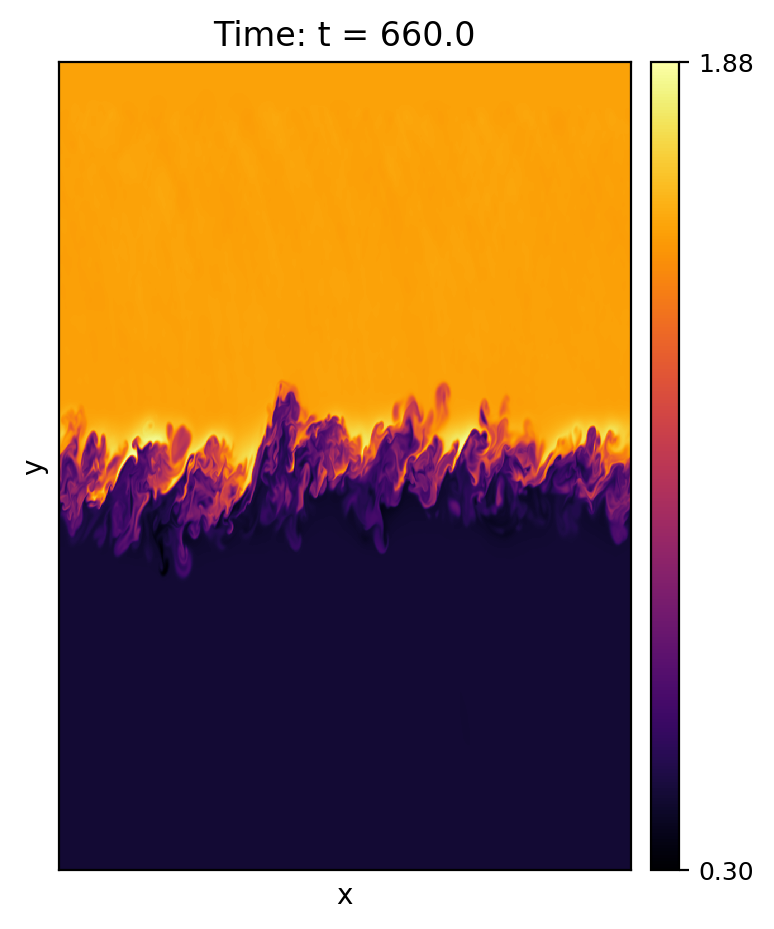

In [6]:
# plot a streamwise xy slice
zslice = Nz/2
reader.sub_domain = (0,0,zslice), (reader.domain_size[0]-1, reader.domain_size[1]-1, zslice)
step = 66#max(steps)
visualize_one(reader, step, qname='rho', plane='xy',cmap='inferno',dtheta=0,domega=0,savename="") 

#'inferno','afmhot','viridis'

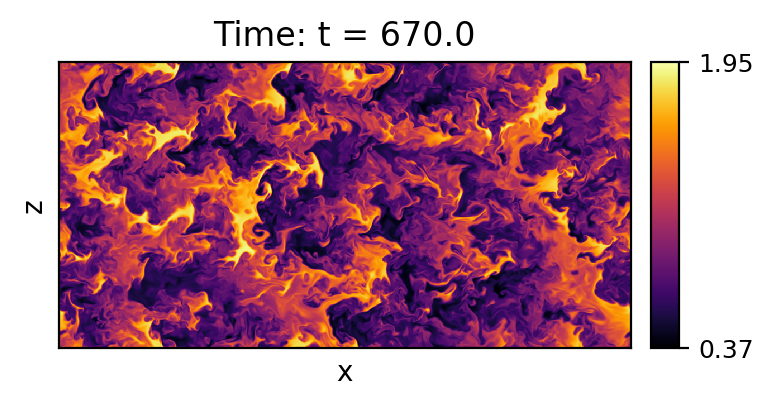

In [7]:
# plot an spanwise xz slice
yslice = Ny/2
reader.sub_domain = (0,yslice,0), (reader.domain_size[0]-1, yslice, reader.domain_size[2]-1)
step = max(steps)
visualize_one(reader, step, qname='rho',plane='xz',cmap='inferno',savename="")

In [10]:
# plot all, don't forget to check reader.subdomain
qname = 'v'
plane = 'xz'

if plane=='xy':
    zslice = Nz/2
    reader.sub_domain = (0,0,zslice), (reader.domain_size[0]-1, reader.domain_size[1]-1, zslice)
elif plane=='xz':
    yslice = Ny/2
    reader.sub_domain = (0,yslice,0), (reader.domain_size[0]-1, yslice, reader.domain_size[2]-1)

for step in steps[:]:
    savename = directory+"/img/slice_%s_%s_%04d.png"%(plane,qname,step)
    visualize_one(reader, step, qname='v', plane=plane,cmap='inferno',dtheta=0,domega=0,savename=savename) 
print('Done')

Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc02/rr3/1024x1448x512//img/slice_xz_v_0000.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc02/rr3/1024x1448x512//img/slice_xz_v_0058.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc02/rr3/1024x1448x512//img/slice_xz_v_0059.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc02/rr3/1024x1448x512//img/slice_xz_v_0060.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc02/rr3/1024x1448x512//img/slice_xz_v_0061.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc02/rr3/1024x1448x512//img/slice_xz_v_0062.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc02/rr3/1024x1448x512//img/slice_xz_v_0063.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc02/rr3/1024x1448x512//img/slice_xz_v_0064.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc02/rr3/1024